In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils import img_to_array, array_to_img, load_img

In [16]:
# Load an image for data augmentation

imagefilepath = '/content/Dog.jpeg'
dog_image = keras.preprocessing.image.load_img(imagefilepath)
dog_image_ary = keras.preprocessing.image.img_to_array(dog_image)
dog = dog_image_ary.reshape((1,)+dog_image_ary.shape)

In [17]:
def plot_image(original_image, trnasformed_image):
  plt.figure(figsize=(15,8))

  # Original Image
  plt.subplot(1,2,1)
  plt.title('Original Image')
  plt.imshow(original_image)

  # Transformed Image
  plt.subplot(1,2,2)
  plt.title('Transformed Image')
  plt.imshow(trnasformed_image)

  plt.show()

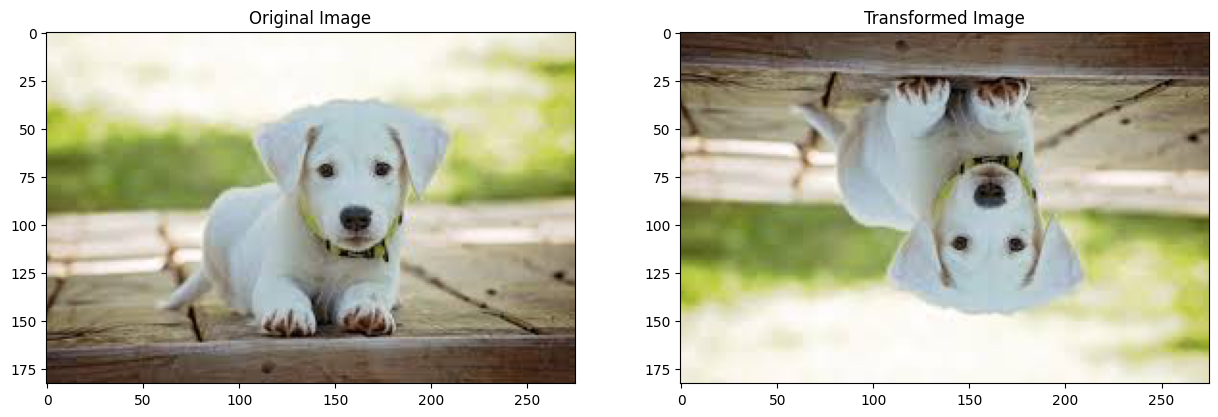

In [21]:
# Vertical Flip
transformed_fn = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True)
transformed_ary = transformed_fn.random_transform(dog_image_ary)
transformed_img = tf.keras.preprocessing.image.array_to_img(transformed_ary)
plot_image(dog_image, transformed_img)

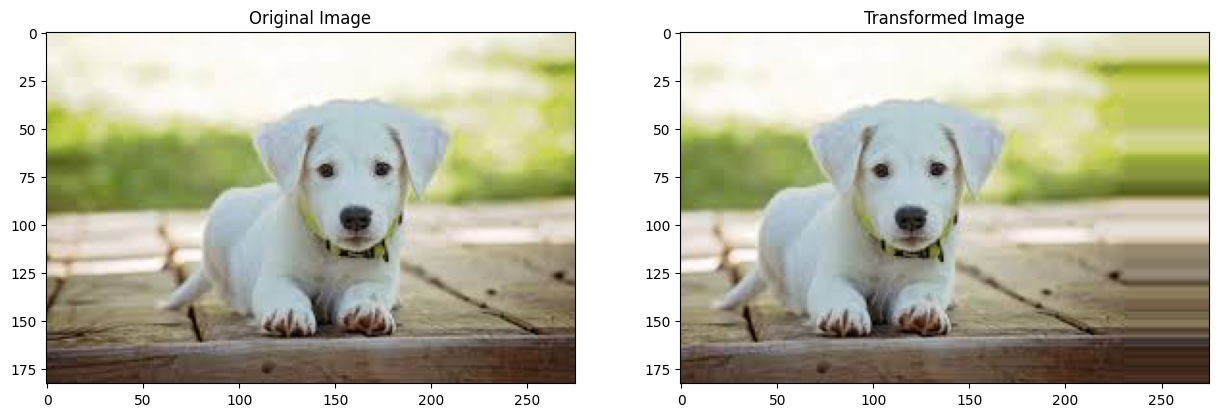

In [24]:
# Height Shift Range
transformed_fn = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=100)
transformed_ary = transformed_fn.random_transform(dog_image_ary)
transformed_img = tf.keras.preprocessing.image.array_to_img(transformed_ary)
plot_image(dog_image, transformed_img)

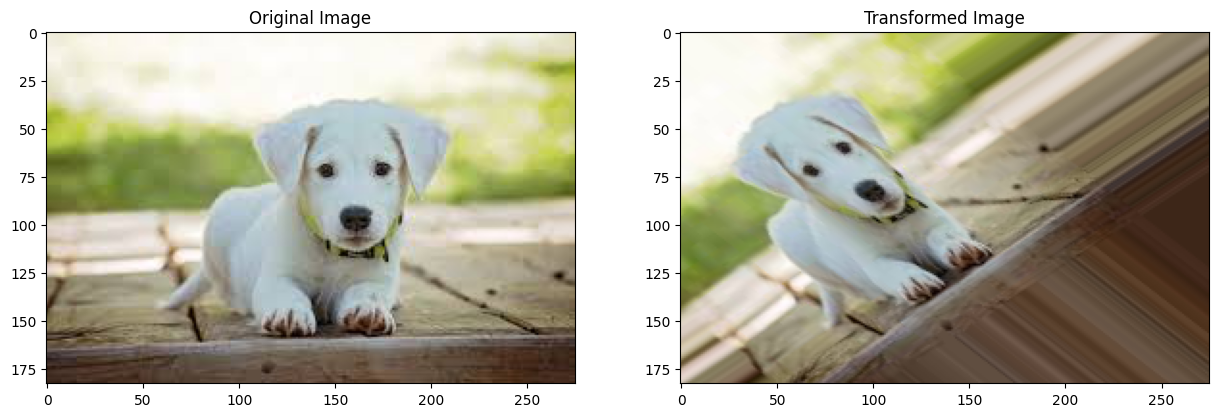

In [25]:
combine_fn = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=50.0,
    zoom_range=0.50,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
)
transformed_ary = combine_fn.random_transform(dog_image_ary)
transformed_img = tf.keras.preprocessing.image.array_to_img(transformed_ary)
plot_image(dog_image, transformed_img)

In [33]:
# Save in Directory
dir_path = '/content/sample_data'
i =0
for image in combine_fn.flow(dog, batch_size=1, save_to_dir= dir_path, save_prefix="dog_img", save_format='jpeg'):
  i+=1
  if i > 10:
    break